In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(caret)

Warning message:
"package 'ggplot2' was built under R version 4.3.3"



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'caret' was built under R version 4.3.3"
Loading required package: lattice



In [2]:
# Load the data
fraud_data <- read.csv("Datasets/fraud.csv")

head(fraud_data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-0.6980436,-0.04419812,1.6811673,0.9745233,-0.245692619,0.34715606,0.19516625,0.08370937,0.3320762,⋯,-0.02528877,0.38346201,-0.17712600,0.1105104,0.2466123,-0.3923114,0.33748690,-0.06418093,149.62,0
2,0,0.6118281,0.16162642,0.1103481,0.3168994,0.043585540,-0.06183566,-0.06418938,0.07217789,-0.2331601,⋯,-0.31188331,-0.88147339,0.16239800,-0.5611484,0.3207289,0.2611633,-0.02269927,0.04488712,2.69,0
3,1,-0.6972977,-0.81384628,1.1753368,0.2685503,-0.365428546,1.35179670,0.64468863,0.21006306,-1.3826241,⋯,0.34258177,1.06504576,1.45808689,-1.1381284,-0.6286053,-0.2885504,-0.13987025,-0.18215547,378.66,0
4,1,-0.4960260,-0.11248295,1.1884502,-0.6104519,-0.007486433,0.93638751,0.19354560,0.32011743,-1.2661192,⋯,-0.14960499,0.00727844,-0.30514637,-1.9410890,1.2420391,-0.4603827,0.15849354,0.18735562,123.50,0
5,2,-0.5945675,0.53302677,1.0265370,0.2849940,-0.295708736,0.07201686,0.48298296,-0.22944885,0.7464582,⋯,-0.01302746,1.10175693,-0.22039050,0.2332575,-0.3952447,1.0419856,0.55445514,0.65590152,69.99,0
6,2,-0.2186654,0.58330073,0.7563618,-0.1189747,0.305725744,-0.02231914,0.38789196,0.22078229,-0.5191011,⋯,-0.28767899,-0.77265121,-0.04232414,-0.6132929,-0.4466323,0.2197161,0.64143563,0.24717586,3.67,0


In [3]:
str(fraud_data)

'data.frame':	283726 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -0.698 0.612 -0.697 -0.496 -0.595 ...
 $ V2    : num  -0.0442 0.1616 -0.8138 -0.1125 0.533 ...
 $ V3    : num  1.68 0.11 1.18 1.19 1.03 ...
 $ V4    : num  0.975 0.317 0.269 -0.61 0.285 ...
 $ V5    : num  -0.24569 0.04359 -0.36543 -0.00749 -0.29571 ...
 $ V6    : num  0.3472 -0.0618 1.3518 0.9364 0.072 ...
 $ V7    : num  0.1952 -0.0642 0.6447 0.1935 0.483 ...
 $ V8    : num  0.0837 0.0722 0.2101 0.3201 -0.2294 ...
 $ V9    : num  0.332 -0.233 -1.383 -1.266 0.746 ...
 $ V10   : num  0.0843 -0.1551 0.1929 -0.0511 0.6996 ...
 $ V11   : num  -0.541 1.583 0.613 -0.222 -0.808 ...
 $ V12   : num  -0.6211 1.0709 0.0664 0.1792 0.5411 ...
 $ V13   : num  -0.996 0.491 0.721 0.51 1.352 ...
 $ V14   : num  -0.327 -0.151 -0.174 -0.302 -1.176 ...
 $ V15   : num  1.605 0.695 2.564 -0.69 0.191 ...
 $ V16   : num  -0.538 0.531 -3.308 -1.213 -0.517 ...
 $ V17   : num  0.247 -0.136 1.317 -0.812 -0.281 ...

In [4]:
summary(fraud_data)

      Time              V1                   V2                  V3           
 Min.   :     0   Min.   :-28.956239   Min.   :-44.15838   Min.   :-32.03166  
 1st Qu.: 54205   1st Qu.: -0.470195   1st Qu.: -0.36456   1st Qu.: -0.58971  
 Median : 84693   Median :  0.010464   Median :  0.03883   Median :  0.11928  
 Mean   : 94811   Mean   :  0.003038   Mean   : -0.00251   Mean   :  0.00107  
 3rd Qu.:139298   3rd Qu.:  0.675590   3rd Qu.:  0.48599   3rd Qu.:  0.68070  
 Max.   :172792   Max.   :  1.260214   Max.   : 13.39509   Max.   :  6.21904  
       V4                  V5                  V6           
 Min.   :-4.018693   Min.   :-82.60176   Min.   :-19.64104  
 1st Qu.:-0.601148   1st Qu.: -0.50096   1st Qu.: -0.57738  
 Median :-0.015732   Median : -0.03883   Median : -0.20659  
 Mean   :-0.002098   Mean   :  0.00133   Mean   : -0.00086  
 3rd Qu.: 0.523020   3rd Qu.:  0.44460   3rd Qu.:  0.29791  
 Max.   :11.932920   Max.   : 25.27339   Max.   : 55.03412  
       V7           

In [5]:
fraud_data$Class <- as.factor(fraud_data$Class)

In [6]:
str(fraud_data)

'data.frame':	283726 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -0.698 0.612 -0.697 -0.496 -0.595 ...
 $ V2    : num  -0.0442 0.1616 -0.8138 -0.1125 0.533 ...
 $ V3    : num  1.68 0.11 1.18 1.19 1.03 ...
 $ V4    : num  0.975 0.317 0.269 -0.61 0.285 ...
 $ V5    : num  -0.24569 0.04359 -0.36543 -0.00749 -0.29571 ...
 $ V6    : num  0.3472 -0.0618 1.3518 0.9364 0.072 ...
 $ V7    : num  0.1952 -0.0642 0.6447 0.1935 0.483 ...
 $ V8    : num  0.0837 0.0722 0.2101 0.3201 -0.2294 ...
 $ V9    : num  0.332 -0.233 -1.383 -1.266 0.746 ...
 $ V10   : num  0.0843 -0.1551 0.1929 -0.0511 0.6996 ...
 $ V11   : num  -0.541 1.583 0.613 -0.222 -0.808 ...
 $ V12   : num  -0.6211 1.0709 0.0664 0.1792 0.5411 ...
 $ V13   : num  -0.996 0.491 0.721 0.51 1.352 ...
 $ V14   : num  -0.327 -0.151 -0.174 -0.302 -1.176 ...
 $ V15   : num  1.605 0.695 2.564 -0.69 0.191 ...
 $ V16   : num  -0.538 0.531 -3.308 -1.213 -0.517 ...
 $ V17   : num  0.247 -0.136 1.317 -0.812 -0.281 ...

In [7]:
summary(fraud_data)

      Time              V1                   V2                  V3           
 Min.   :     0   Min.   :-28.956239   Min.   :-44.15838   Min.   :-32.03166  
 1st Qu.: 54205   1st Qu.: -0.470195   1st Qu.: -0.36456   1st Qu.: -0.58971  
 Median : 84693   Median :  0.010464   Median :  0.03883   Median :  0.11928  
 Mean   : 94811   Mean   :  0.003038   Mean   : -0.00251   Mean   :  0.00107  
 3rd Qu.:139298   3rd Qu.:  0.675590   3rd Qu.:  0.48599   3rd Qu.:  0.68070  
 Max.   :172792   Max.   :  1.260214   Max.   : 13.39509   Max.   :  6.21904  
       V4                  V5                  V6           
 Min.   :-4.018693   Min.   :-82.60176   Min.   :-19.64104  
 1st Qu.:-0.601148   1st Qu.: -0.50096   1st Qu.: -0.57738  
 Median :-0.015732   Median : -0.03883   Median : -0.20659  
 Mean   :-0.002098   Mean   :  0.00133   Mean   : -0.00086  
 3rd Qu.: 0.523020   3rd Qu.:  0.44460   3rd Qu.:  0.29791  
 Max.   :11.932920   Max.   : 25.27339   Max.   : 55.03412  
       V7           

## EDA

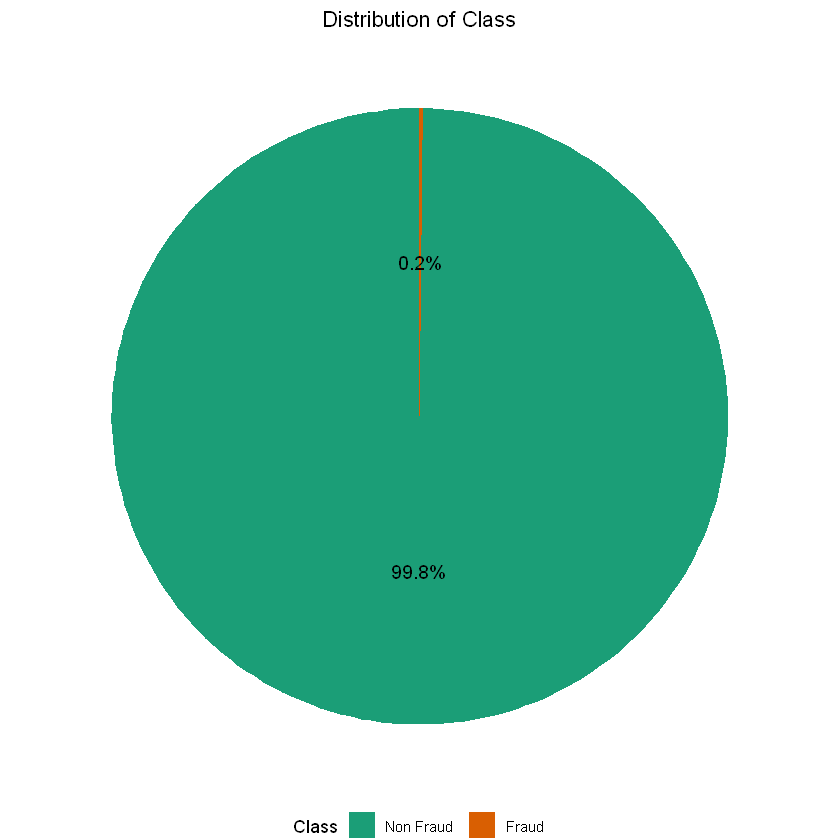

In [8]:
class_percentages <- prop.table(table(fraud_data$Class)) * 100

# Create a data frame for the pie chart
pie_data <- data.frame(Class = names(class_percentages), Percentage = as.vector(class_percentages))

# Create a pie chart
pie_chart <- ggplot(data = pie_data, aes(x = "", y = Percentage, fill = Class)) +
  geom_bar(stat = "identity") +
  coord_polar("y", start = 0) +  # Convert the bar plot to a pie chart
  labs(title = "Distribution of Class",
       fill = "Class",
       y = "Percentage") +
  geom_text(aes(label = paste0(round(Percentage, 1), "%")), position = position_stack(vjust = 0.5), size = 4) +  # Add percentage labels
  theme_void() +  # Remove axis and grid lines
  theme(legend.position = "bottom", plot.title = element_text(hjust = 0.5)) +  # Position the legend at the bottom and center the title
  scale_fill_manual(labels = c("Non Fraud", "Fraud"), values = c("#1b9e77", "#d95f02"))  # Set custom labels and colors

# Display the pie chart
print(pie_chart)

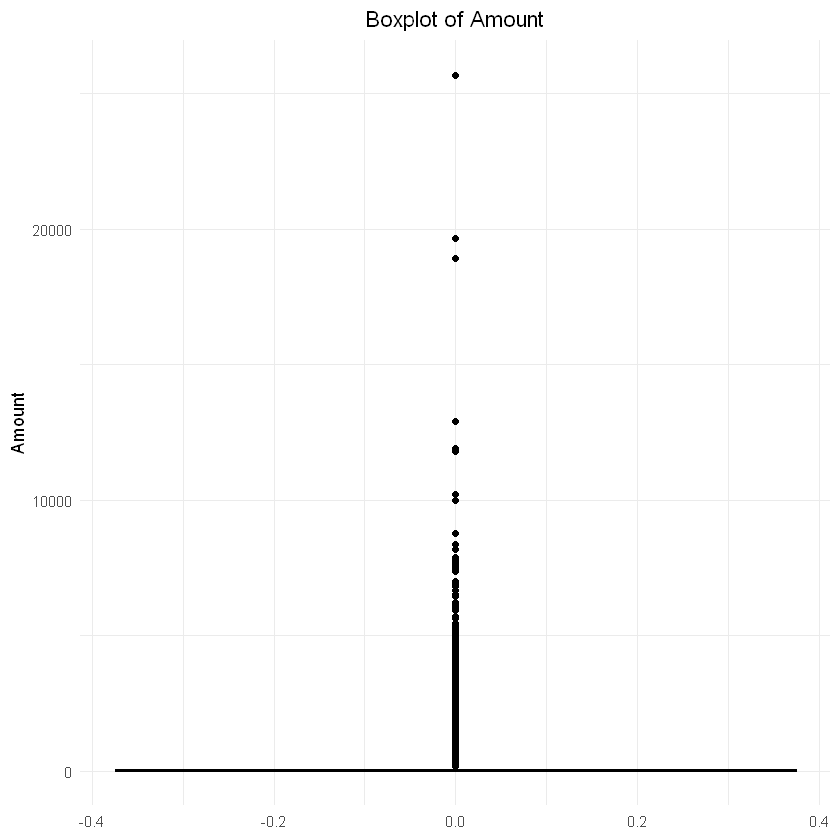

In [9]:
# Create a boxplot for the Amount variable
amount_boxplot <- ggplot(fraud_data, aes(y = Amount)) +
  geom_boxplot(fill = "#0072B2", color = "black") +
  labs(title = "Boxplot of Amount",
       y = "Amount") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

# Display the boxplot
print(amount_boxplot)


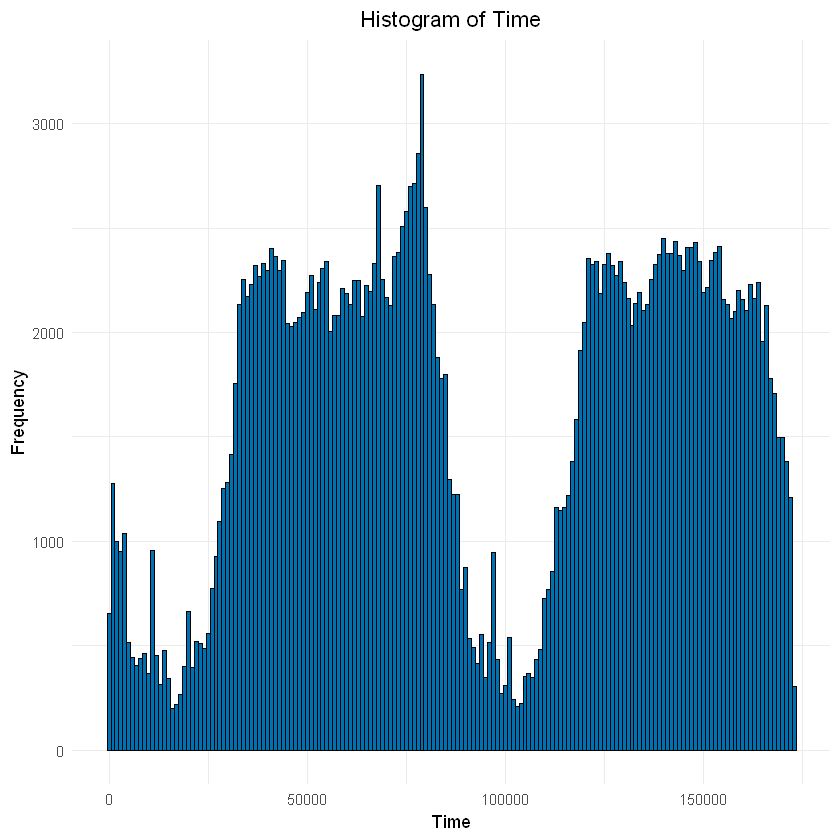

In [10]:
# Create a histogram for the Time variable
time_histogram <- ggplot(fraud_data, aes(x = Time)) +
  geom_histogram(binwidth = 1000, fill = "#0072B2", color = "black") +
  labs(title = "Histogram of Time",
       x = "Time",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

# Display the histogram
print(time_histogram)

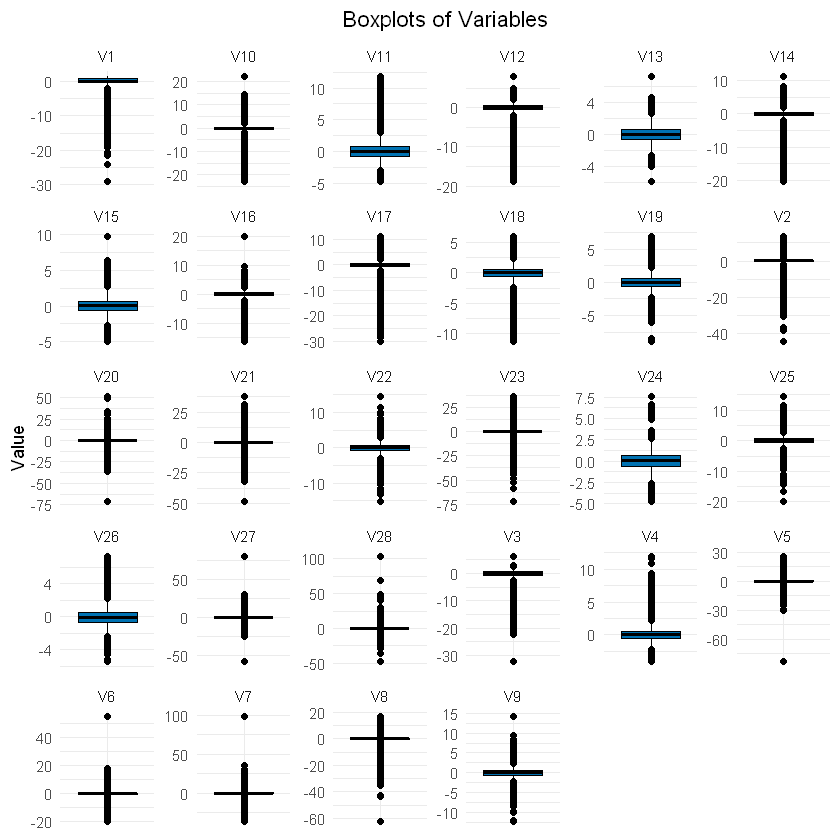

In [11]:
# Reshape the data to long format for boxplot
fraud_data_long <- fraud_data %>%
  select(-Time, -Class) %>%  # Exclude 'Time' and 'Class' columns
  pivot_longer(cols = -Amount, names_to = "Variable", values_to = "Value")

# Create separate boxplots for each variable
boxplots <- ggplot(fraud_data_long, aes(x = Variable, y = Value)) +
  geom_boxplot(fill = "#0072B2", color = "black") +
  labs(title = "Boxplots of Variables",
       x = NULL,  # Remove x-axis label
       y = "Value") +
  theme_minimal() +
  theme(axis.text.x = element_blank(),  # Remove x-axis labels
        strip.placement = "bottom",   # Place facet strip labels at the bottom
        plot.title = element_text(hjust = 0.5)) +  # Center title
  facet_wrap(~ Variable, scales = "free")  # Facet by variable with free scales

# Display the boxplots
print(boxplots)

## LOGISTIC REGRESSION

Model using all variables

In [12]:
fit1 <- glm(Class ~ ., data=fraud_data, family=binomial)
summary(fit1)


Call:
glm(formula = Class ~ ., family = binomial, data = fraud_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.398e+00  2.499e-01 -33.602  < 2e-16 ***
Time        -3.676e-06  2.259e-06  -1.627 0.103644    
V1           1.873e-01  8.251e-02   2.270 0.023223 *  
V2           1.747e-02  9.585e-02   0.182 0.855338    
V3          -1.258e-02  8.012e-02  -0.157 0.875214    
V4           9.918e-01  1.046e-01   9.484  < 2e-16 ***
V5           1.797e-01  9.206e-02   1.952 0.050930 .  
V6          -1.651e-01  9.879e-02  -1.671 0.094654 .  
V7          -1.164e-01  8.192e-02  -1.421 0.155426    
V8          -2.082e-01  3.609e-02  -5.769 7.95e-09 ***
V9          -3.095e-01  1.213e-01  -2.551 0.010746 *  
V10         -8.859e-01  1.043e-01  -8.497  < 2e-16 ***
V11         -5.899e-02  8.292e-02  -0.711 0.476836    
V12          8.268e-02  8.653e-02   0.955 0.339352    
V13         -3.242e-01  8.133e-02  -3.986 6.71e-05 ***
V14         -5.215e-01  5.936e-02  

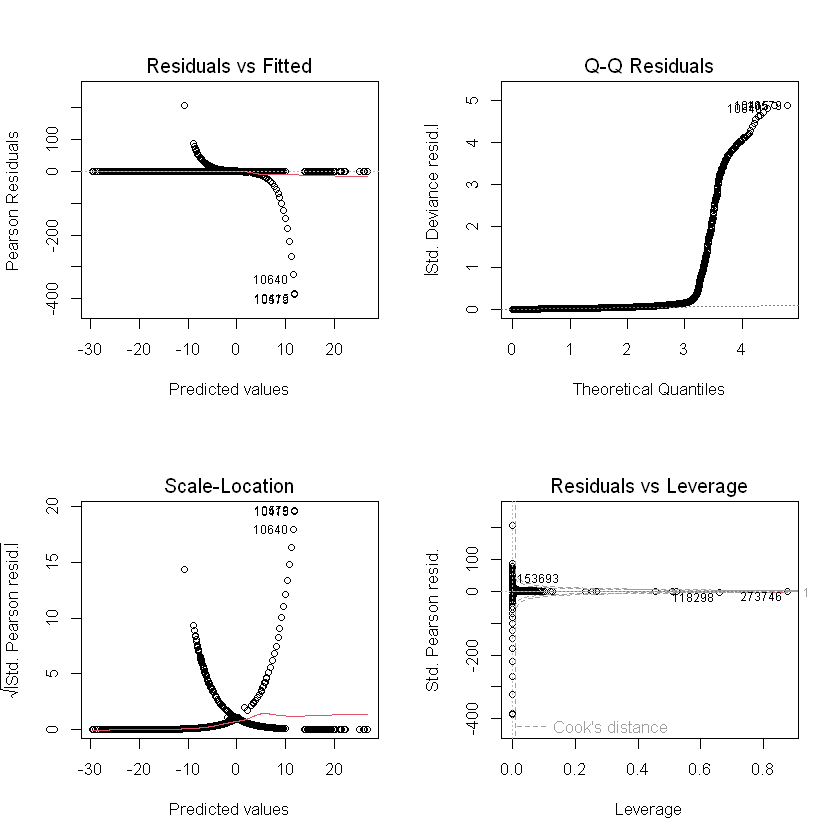

In [13]:
par(mfrow=c(2,2))
plot(fit1)

In [14]:
actual <- fraud_data$Class
predicted <- round(fitted(fit1))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual      0      1
     0 283211     42
     1    184    289

In [15]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.999

Removing V2, V3, V17, V18, V25, V26

In [16]:
fit2 <- glm(Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, data=fraud_data, family=binomial)
summary(fit2)


Call:
glm(formula = Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, family = binomial, 
    data = fraud_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.421e+00  2.118e-01 -39.751  < 2e-16 ***
Time        -3.400e-06  1.893e-06  -1.795 0.072576 .  
V1           1.911e-01  7.527e-02   2.539 0.011108 *  
V4           9.837e-01  9.384e-02  10.484  < 2e-16 ***
V5           1.612e-01  5.587e-02   2.885 0.003917 ** 
V6          -1.640e-01  9.359e-02  -1.753 0.079652 .  
V7          -1.294e-01  7.282e-02  -1.777 0.075591 .  
V8          -2.092e-01  3.513e-02  -5.956 2.58e-09 ***
V9          -3.239e-01  9.602e-02  -3.373 0.000743 ***
V10         -8.791e-01  9.765e-02  -9.003  < 2e-16 ***
V11         -5.596e-02  7.779e-02  -0.719 0.471909    
V12          6.915e-02  7.299e-02   0.947 0.343457    
V13         -3.191e-01  7.981e-02  -3.999 6.37e-05 ***
V14         -5.215e-01  5.714e-02  -9.127  < 2e-16 ***
V15         -1.092e-01  7.586e-02  -1.440 0.149847 

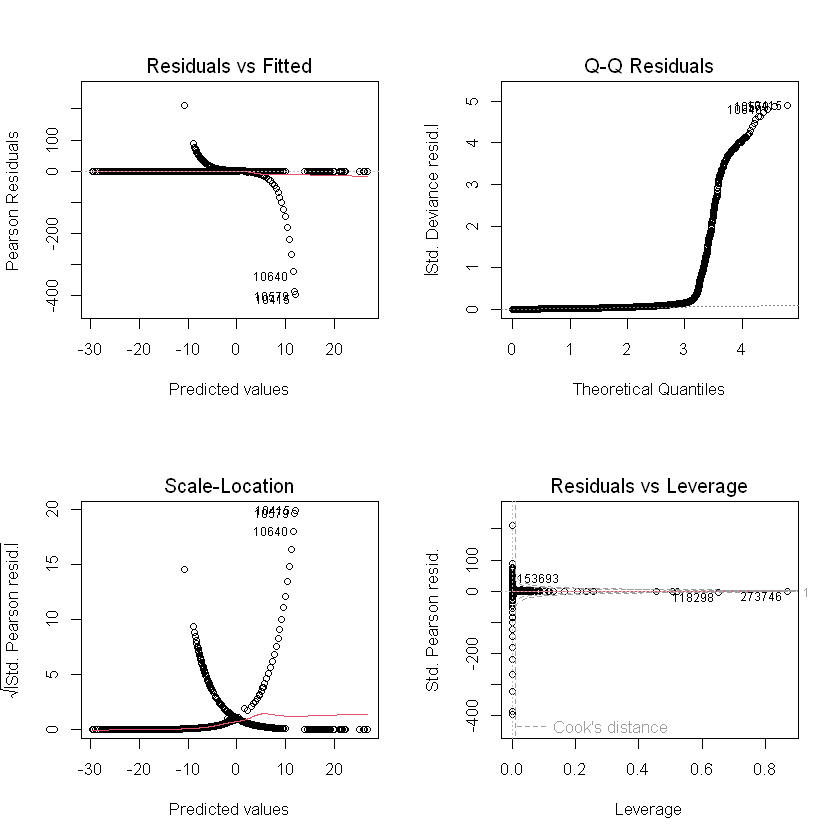

In [17]:
par(mfrow=c(2,2))
plot(fit2)

In [18]:
actual <- fraud_data$Class
predicted <- round(fitted(fit2))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual      0      1
     0 283211     42
     1    184    289

In [19]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.999

Removing V2, V3, V6, V7, V9, V11, V12, V15, V16, V17, V18, V19, V24, V25, V26 and Time

In [20]:
fit3 <- glm(Class ~ . - Time - V2 - V3 - V6 - V7 - V9 - V11 - V12 - V15 - V16 - V17 - V18 - V19 - V24 - V25 - V26 , data=fraud_data, family = "binomial")
summary(fit3)


Call:
glm(formula = Class ~ . - Time - V2 - V3 - V6 - V7 - V9 - V11 - 
    V12 - V15 - V16 - V17 - V18 - V19 - V24 - V25 - V26, family = "binomial", 
    data = fraud_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.7737740  0.1355764 -64.715  < 2e-16 ***
V1           0.0543642  0.0514396   1.057  0.29058    
V4           1.0676823  0.0785399  13.594  < 2e-16 ***
V5           0.1028896  0.0448961   2.292  0.02192 *  
V8          -0.1781035  0.0236294  -7.537 4.80e-14 ***
V10         -1.0045279  0.0886547 -11.331  < 2e-16 ***
V13         -0.3275223  0.0756768  -4.328 1.51e-05 ***
V14         -0.4927512  0.0471381 -10.453  < 2e-16 ***
V20         -0.1787699  0.0405015  -4.414 1.02e-05 ***
V21          0.3643965  0.0348196  10.465  < 2e-16 ***
V22          0.5909388  0.0830337   7.117 1.10e-12 ***
V23         -0.0860420  0.0309023  -2.784  0.00536 ** 
V27         -0.2682902  0.0448541  -5.981 2.21e-09 ***
V28         -0.0831074  0.0308420  -2.695

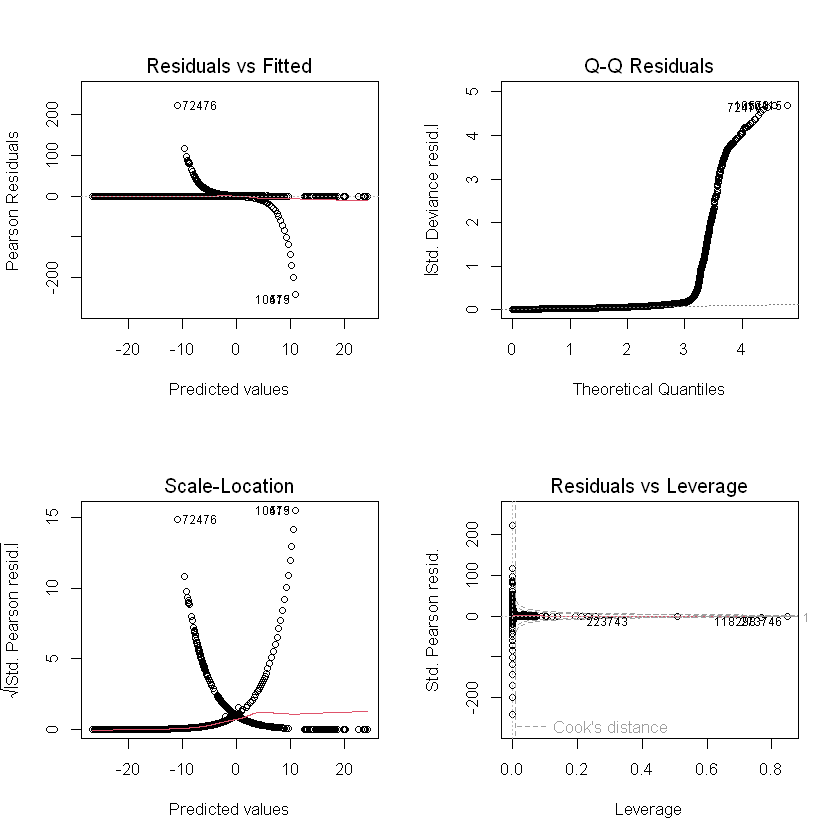

In [21]:
par(mfrow=c(2,2))
plot(fit3)

In [22]:
actual <- fraud_data$Class
predicted <- round(fitted(fit3))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual      0      1
     0 283203     50
     1    191    282

In [23]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.999

Removing V1, V2, V3, V6, V7, V9, V11, V12, V15, V16, V17, V18, V19, V24, V25, V26, Amount and Time

In [24]:
fit4 <- glm(Class ~ . - Amount - Time - V1 - V2 - V3 - V6 - V7 - V9 - V11 - V12 - V15 - V16 - V17 - V18 - V19 - V24 - V25 - V26 , data=fraud_data, family = "binomial")
summary(fit4)


Call:
glm(formula = Class ~ . - Amount - Time - V1 - V2 - V3 - V6 - 
    V7 - V9 - V11 - V12 - V15 - V16 - V17 - V18 - V19 - V24 - 
    V25 - V26, family = "binomial", data = fraud_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.76382    0.13242 -66.181  < 2e-16 ***
V4           1.01901    0.06461  15.772  < 2e-16 ***
V5           0.12552    0.03105   4.042 5.29e-05 ***
V8          -0.17595    0.02149  -8.187 2.67e-16 ***
V10         -0.96346    0.07208 -13.366  < 2e-16 ***
V13         -0.33908    0.07473  -4.537 5.70e-06 ***
V14         -0.51684    0.04066 -12.712  < 2e-16 ***
V20         -0.16857    0.03118  -5.406 6.43e-08 ***
V21          0.36280    0.03454  10.503  < 2e-16 ***
V22          0.61209    0.08089   7.567 3.81e-14 ***
V23         -0.08206    0.02751  -2.983  0.00286 ** 
V27         -0.24545    0.03570  -6.874 6.22e-12 ***
V28         -0.07768    0.02648  -2.933  0.00335 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.

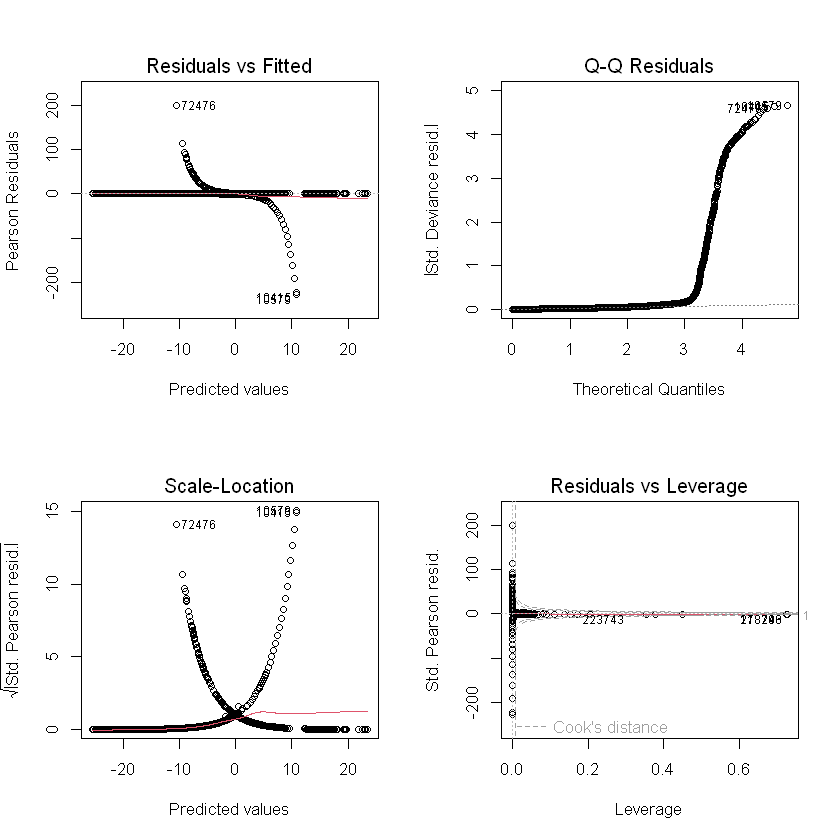

In [25]:
par(mfrow=c(2,2))
plot(fit4)

In [26]:
actual <- fraud_data$Class
predicted <- round(fitted(fit4))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual      0      1
     0 283203     50
     1    193    280

In [27]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.999

THE ACCURACY WILL ALWAYS BE AROUND 99% SO NOW DATA IMBALANCE NEEDS TO BE HANDELED

UPSAMPLING

In [28]:
up_fraud_data <- upSample(x=fraud_data[,-ncol(fraud_data)], y=fraud_data$Class)
up_fraud_data$Class <- as.factor(up_fraud_data$Class)

In [29]:
summary(up_fraud_data$Class)

0      1 
283253 283253

In [30]:
fit5 <- glm(Class ~ ., data=up_fraud_data, family=binomial)
summary(fit5)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ ., family = binomial, data = up_fraud_data)

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -3.446e+00  3.342e-02 -103.115  < 2e-16 ***
Time        -8.057e-06  2.125e-07  -37.917  < 2e-16 ***
V1           1.296e+00  2.947e-02   43.974  < 2e-16 ***
V2           9.718e-01  3.680e-02   26.409  < 2e-16 ***
V3           4.162e-01  1.790e-02   23.254  < 2e-16 ***
V4           1.067e+00  1.008e-02  105.856  < 2e-16 ***
V5           1.049e+00  2.409e-02   43.542  < 2e-16 ***
V6          -7.192e-01  1.530e-02  -46.996  < 2e-16 ***
V7          -6.829e-01  2.625e-02  -26.018  < 2e-16 ***
V8          -4.981e-01  8.760e-03  -56.860  < 2e-16 ***
V9          -3.415e-01  1.108e-02  -30.815  < 2e-16 ***
V10         -7.600e-01  1.489e-02  -51.052  < 2e-16 ***
V11          4.796e-01  9.895e-03   48.468  < 2e-16 ***
V12         -1.027e+00  1.407e-02  -73.023  < 2e-16 ***
V13         -3.652e-01  6.719e-03  -54.352  < 2e-16 ***
V14         -1.3

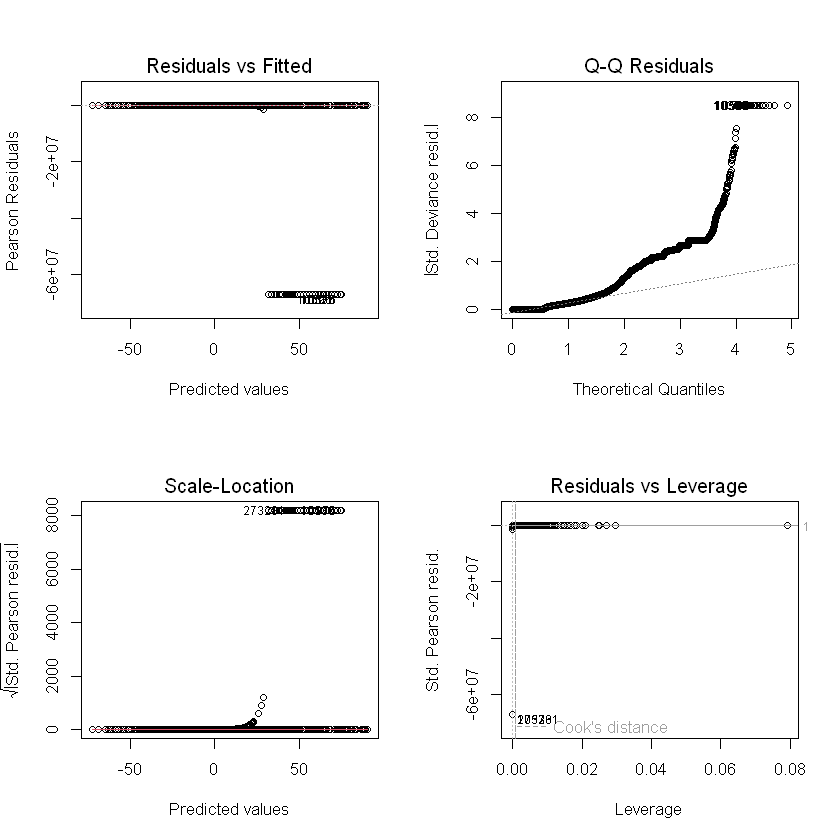

In [31]:
par(mfrow=c(2,2))
plot(fit5)

In [32]:
actual <- up_fraud_data$Class
predicted <- round(fitted(fit5))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual      0      1
     0 276739   6514
     1  22674 260579

In [33]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.948

In [34]:
fit6 <- glm(Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, data=up_fraud_data, family=binomial)
summary(fit6)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, family = binomial, 
    data = up_fraud_data)

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -2.885e+00  1.699e-02 -169.827  < 2e-16 ***
Time        -5.781e-06  1.656e-07  -34.900  < 2e-16 ***
V1           3.118e-01  8.690e-03   35.882  < 2e-16 ***
V4           1.131e+00  7.617e-03  148.465  < 2e-16 ***
V5           2.343e-01  6.952e-03   33.696  < 2e-16 ***
V6          -4.429e-01  9.543e-03  -46.413  < 2e-16 ***
V7          -9.232e-03  8.117e-03   -1.137 0.255356    
V8          -4.194e-01  5.775e-03  -72.611  < 2e-16 ***
V9          -2.803e-01  8.791e-03  -31.880  < 2e-16 ***
V10         -5.468e-01  1.003e-02  -54.502  < 2e-16 ***
V11          2.640e-01  6.869e-03   38.440  < 2e-16 ***
V12         -6.404e-01  7.259e-03  -88.222  < 2e-16 ***
V13         -3.132e-01  6.400e-03  -48.939  < 2e-16 ***
V14         -8.141e-01  6.529e-03 -124.688  < 2e-16 ***
V15         -1.317e-01  6.629e-03

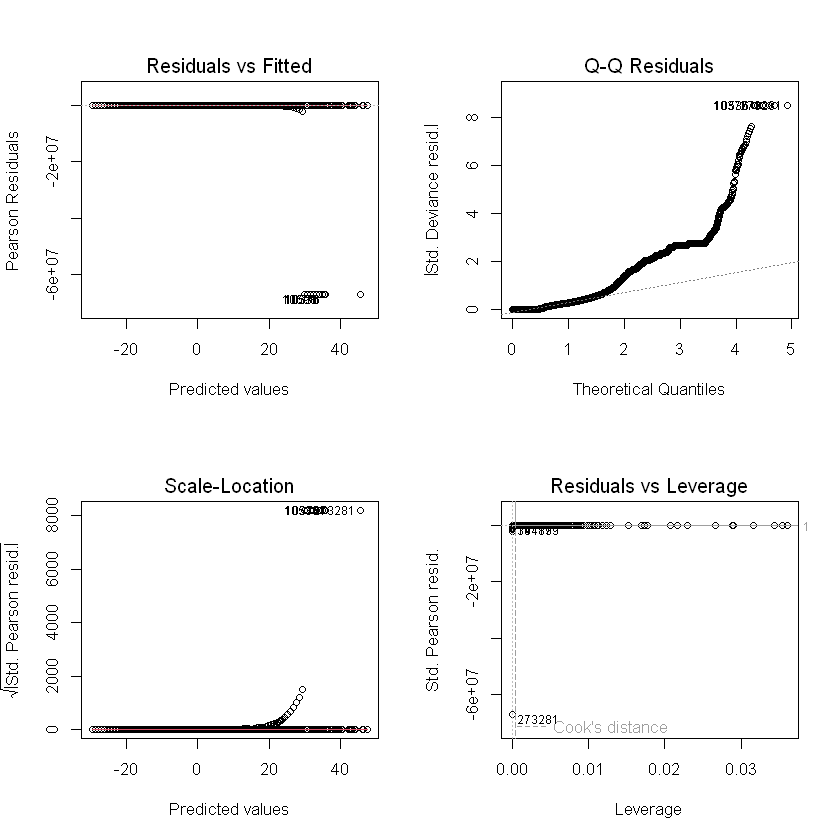

In [35]:
par(mfrow=c(2,2))
plot(fit6)

In [36]:
actual <- up_fraud_data$Class
predicted <- round(fitted(fit6))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual      0      1
     0 276103   7150
     1  25015 258238

In [37]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.943

In [38]:
fit7 <- glm(Class ~ . - Time - V2 - V3 - V6 - V7 - V9 - V11 - V12 - V15 - V16 - V17 - V18 - V19 - V24 - V25 - V26 , data=up_fraud_data, family = "binomial")
summary(fit7)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - Time - V2 - V3 - V6 - V7 - V9 - V11 - 
    V12 - V15 - V16 - V17 - V18 - V19 - V24 - V25 - V26, family = "binomial", 
    data = up_fraud_data)

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -3.295e+00  1.085e-02 -303.696  < 2e-16 ***
V1           5.122e-03  5.381e-03    0.952    0.341    
V4           1.355e+00  7.212e-03  187.863  < 2e-16 ***
V5           2.463e-01  5.190e-03   47.455  < 2e-16 ***
V8          -2.741e-01  4.668e-03  -58.716  < 2e-16 ***
V10         -7.976e-01  9.301e-03  -85.753  < 2e-16 ***
V13         -3.238e-01  6.275e-03  -51.601  < 2e-16 ***
V14         -7.274e-01  5.748e-03 -126.551  < 2e-16 ***
V20         -2.368e-01  6.643e-03  -35.650  < 2e-16 ***
V21          1.600e-01  4.996e-03   32.020  < 2e-16 ***
V22          3.028e-01  6.523e-03   46.421  < 2e-16 ***
V23         -1.587e-01  3.095e-03  -51.277  < 2e-16 ***
V27         -9.148e-02  5.828e-03  -15.695  < 2e-16 ***
V28          3.893e-02  

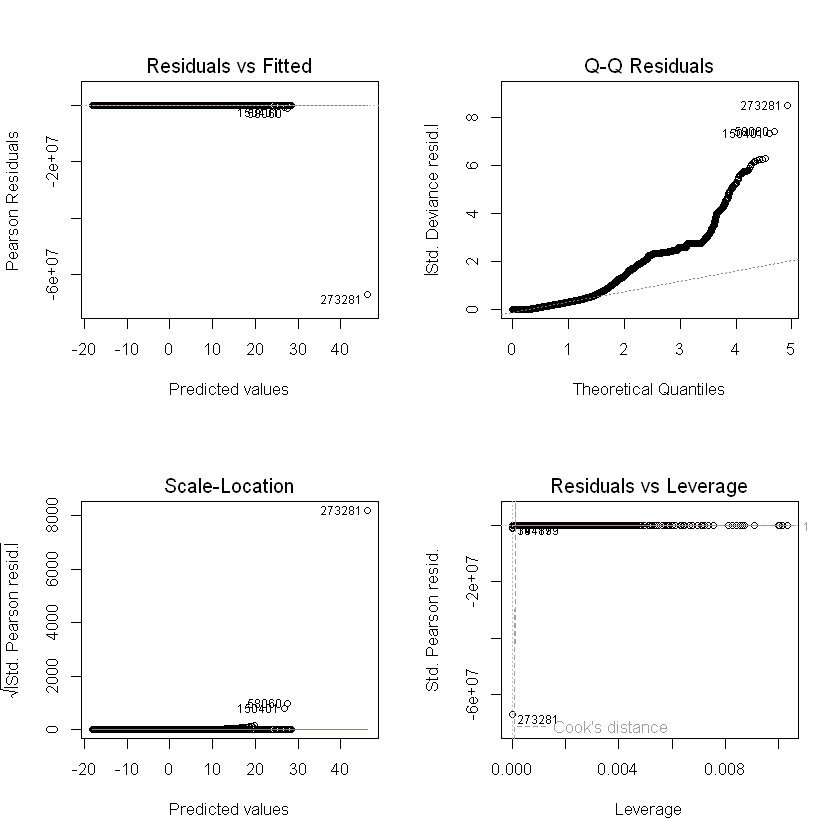

In [39]:
par(mfrow=c(2,2))
plot(fit7)

In [40]:
actual <- up_fraud_data$Class
predicted <- round(fitted(fit7))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual      0      1
     0 274576   8677
     1  26737 256516

In [41]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.937

In [42]:
fit8 <- glm(Class ~ . - Amount - Time - V1 - V2 - V3 - V6 - V7 - V9 - V11 - V12 - V15 - V16 - V17 - V18 - V19 - V24 - V25 - V26 , data=up_fraud_data, family = "binomial")
summary(fit8)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - Amount - Time - V1 - V2 - V3 - V6 - 
    V7 - V9 - V11 - V12 - V15 - V16 - V17 - V18 - V19 - V24 - 
    V25 - V26, family = "binomial", data = up_fraud_data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.144294   0.010002 -314.36   <2e-16 ***
V4           1.377989   0.006786  203.06   <2e-16 ***
V5           0.162232   0.005021   32.31   <2e-16 ***
V8          -0.339972   0.004664  -72.89   <2e-16 ***
V10         -0.794392   0.008787  -90.41   <2e-16 ***
V13         -0.337225   0.006200  -54.39   <2e-16 ***
V14         -0.704542   0.005642 -124.89   <2e-16 ***
V20         -0.094374   0.005435  -17.36   <2e-16 ***
V21          0.192487   0.004997   38.52   <2e-16 ***
V22          0.283776   0.006463   43.91   <2e-16 ***
V23         -0.181447   0.003049  -59.51   <2e-16 ***
V27         -0.093258   0.005767  -16.17   <2e-16 ***
V28          0.007744   0.006198    1.25    0.211    
---
Signif. codes:  0 '***' 0.001 '**'

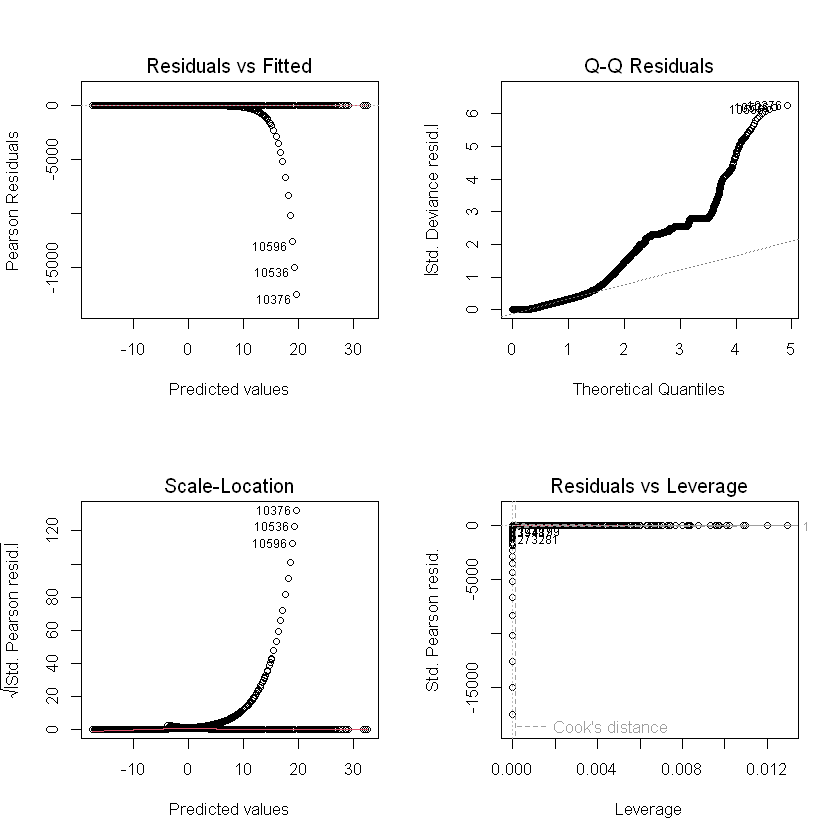

In [43]:
par(mfrow=c(2,2))
plot(fit8)

In [44]:
actual <- up_fraud_data$Class
predicted <- round(fitted(fit8))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual      0      1
     0 274696   8557
     1  26734 256519

In [45]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.938

DOWNSAMPLING

In [46]:
down_fraud_data <- downSample(x=fraud_data[,-ncol(fraud_data)], y=fraud_data$Class)
down_fraud_data$Class <- as.factor(down_fraud_data$Class)

In [47]:
summary(down_fraud_data$Class)

0   1 
473 473

In [48]:
fit9 <- glm(Class ~ ., data=down_fraud_data, family=binomial)
summary(fit9)

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ ., family = binomial, data = down_fraud_data)

Coefficients:
              Estimate Std. Error   z value Pr(>|z|)    
(Intercept) -8.376e+13  7.386e+06 -11340800   <2e-16 ***
Time        -9.195e+08  6.676e+01 -13772789   <2e-16 ***
V1          -1.326e+14  2.803e+06 -47289353   <2e-16 ***
V2          -1.610e+14  5.049e+06 -31877808   <2e-16 ***
V3          -7.308e+13  3.030e+06 -24118625   <2e-16 ***
V4           2.558e+14  2.540e+06 100702944   <2e-16 ***
V5          -7.987e+13  3.929e+06 -20328294   <2e-16 ***
V6          -5.718e+13  3.245e+06 -17621599   <2e-16 ***
V7           1.389e+14  4.100e+06  33870616   <2e-16 ***
V8          -1.252e+14  1.662e+06 -75346642   <2e-16 ***
V9           7.784e+12  2.450e+06   3176793   <2e-16 ***
V10          4.172e+13  2.330e+06  17900477   <2e-16 ***
V11          6.835e+13  2.415e+06  28305523   <2e-16 ***
V12         -7.808e+13  1.957e+06 -39893999   <2e-16 ***
V13         -2.507e+13  2.177e+06 -11514319   <2e-16 **

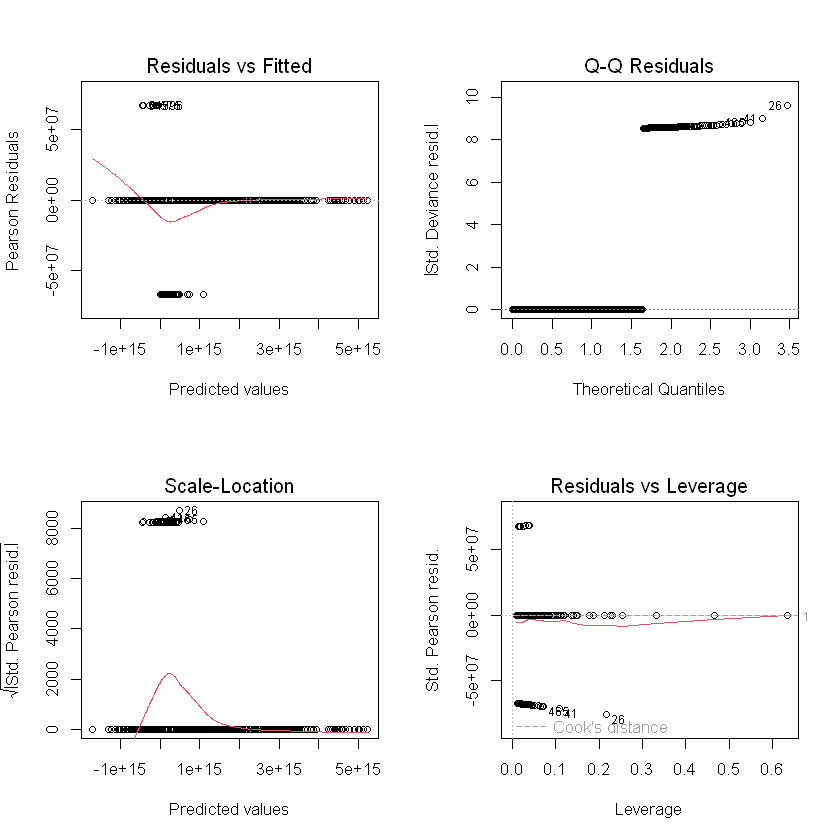

In [49]:
par(mfrow=c(2,2))
plot(fit9)

In [50]:
actual <- down_fraud_data$Class
predicted <- round(fitted(fit9))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual   0   1
     0 393  80
     1  14 459

In [51]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.901

In [52]:
fit10 <- glm(Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, data=down_fraud_data, family=binomial)
summary(fit10)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, family = binomial, 
    data = down_fraud_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.395e+00  4.836e-01  -7.019 2.24e-12 ***
Time        -2.643e-06  4.595e-06  -0.575 0.565220    
V1          -2.715e-02  2.577e-01  -0.105 0.916095    
V4           1.282e+00  2.137e-01   6.001 1.96e-09 ***
V5           1.150e-01  2.142e-01   0.537 0.591185    
V6          -4.573e-01  2.739e-01  -1.669 0.095046 .  
V7          -3.311e-01  2.729e-01  -1.213 0.225048    
V8          -1.081e+00  2.821e-01  -3.832 0.000127 ***
V9          -1.797e-01  2.578e-01  -0.697 0.485903    
V10         -5.693e-01  3.372e-01  -1.688 0.091346 .  
V11          4.527e-01  1.872e-01   2.418 0.015609 *  
V12         -6.326e-01  2.047e-01  -3.091 0.001994 ** 
V13         -2.623e-01  1.771e-01  -1.481 0.138505    
V14         -9.440e-01  1.986e-01  -4.752 2.01e-06 ***
V15         -1.554e-01  2.022e-01  -0.769 0.44

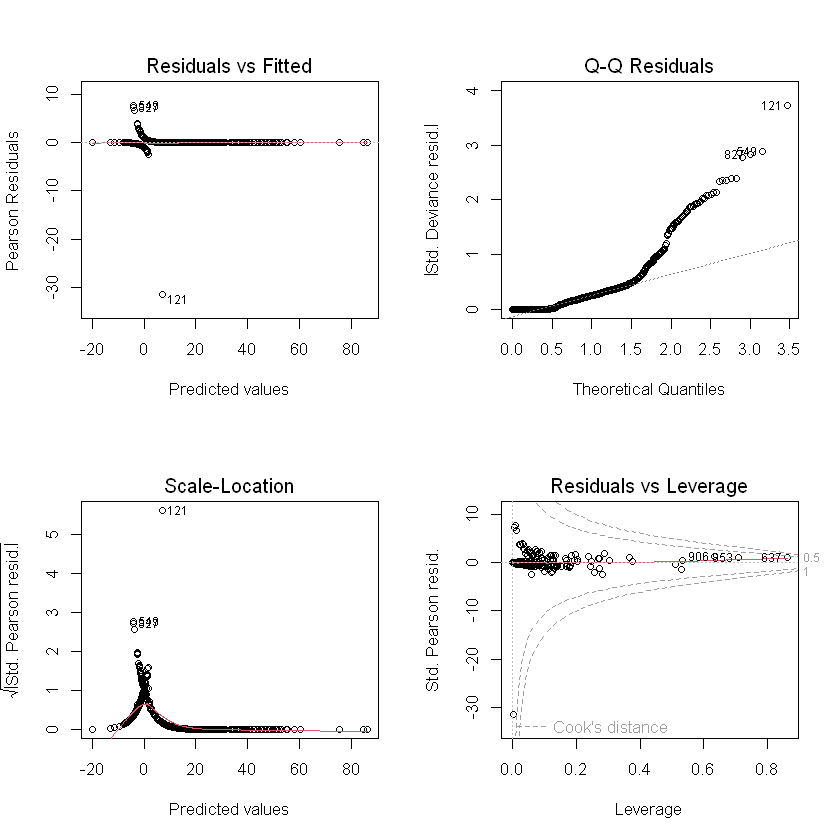

In [53]:
par(mfrow=c(2,2))
plot(fit10)

In [54]:
actual <- down_fraud_data$Class
predicted <- round(fitted(fit10))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual   0   1
     0 462  11
     1  34 439

In [55]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.952

In [56]:
fit11 <- glm(Class ~ . - Time - V2 - V3 - V6 - V7 - V9 - V11 - V12 - V15 - V16 - V17 - V18 - V19 - V24 - V25 - V26 , data=down_fraud_data, family = "binomial")
summary(fit11)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - Time - V2 - V3 - V6 - V7 - V9 - V11 - 
    V12 - V15 - V16 - V17 - V18 - V19 - V24 - V25 - V26, family = "binomial", 
    data = down_fraud_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.4190185  0.2878784 -11.877  < 2e-16 ***
V1          -0.4481383  0.1793095  -2.499  0.01245 *  
V4           1.5395902  0.2021202   7.617 2.59e-14 ***
V5           0.0333827  0.1614401   0.207  0.83618    
V8          -0.9213656  0.2276913  -4.047 5.20e-05 ***
V10         -0.8240366  0.2818571  -2.924  0.00346 ** 
V13         -0.3111517  0.1642938  -1.894  0.05824 .  
V14         -0.8223810  0.1695073  -4.852 1.22e-06 ***
V20         -0.5700248  0.2768682  -2.059  0.03951 *  
V21         -0.3690881  0.1788154  -2.064  0.03901 *  
V22          0.3817472  0.1827023   2.089  0.03667 *  
V23         -0.2348681  0.0942723  -2.491  0.01272 *  
V27          0.1699842  0.1818252   0.935  0.34985    
V28          0.1234452  0.2654904   

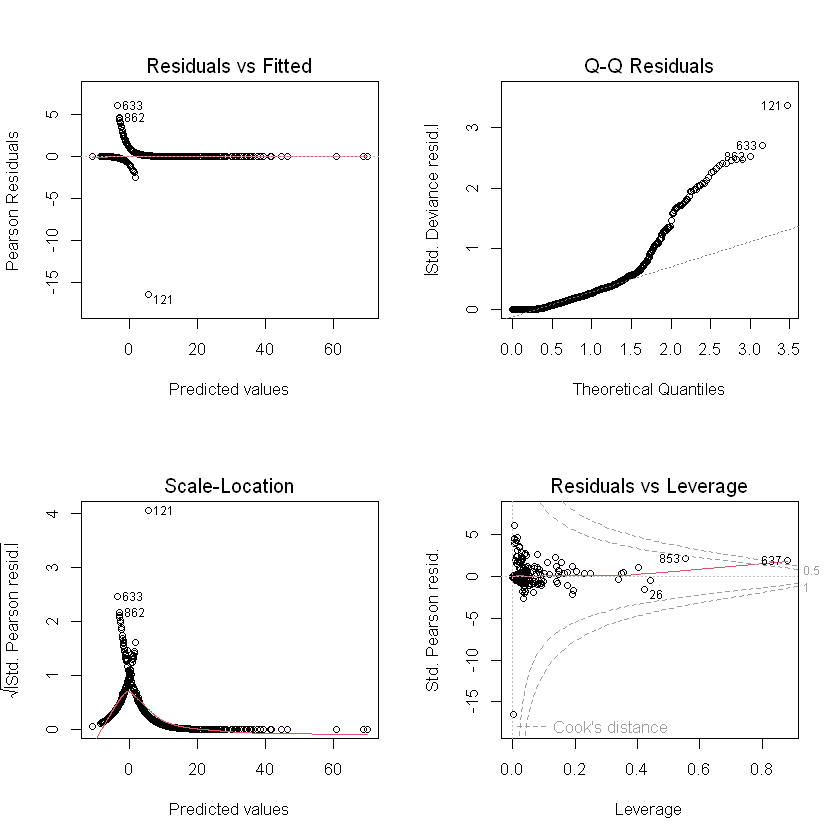

In [57]:
par(mfrow=c(2,2))
plot(fit11)

In [58]:
actual <- down_fraud_data$Class
predicted <- round(fitted(fit11))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual   0   1
     0 457  16
     1  39 434

In [59]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.942

In [60]:
fit12 <- glm(Class ~ . - Amount - Time - V1 - V2 - V3 - V6 - V7 - V9 - V11 - V12 - V15 - V16 - V17 - V18 - V19 - V24 - V25 - V26 , data=down_fraud_data, family = "binomial")
summary(fit12)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - Amount - Time - V1 - V2 - V3 - V6 - 
    V7 - V9 - V11 - V12 - V15 - V16 - V17 - V18 - V19 - V24 - 
    V25 - V26, family = "binomial", data = down_fraud_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.23954    0.26108 -12.408  < 2e-16 ***
V4           1.61847    0.19832   8.161 3.33e-16 ***
V5          -0.12319    0.16047  -0.768 0.442690    
V8          -0.81040    0.17766  -4.562 5.08e-06 ***
V10         -0.91327    0.27746  -3.292 0.000996 ***
V13         -0.38213    0.15758  -2.425 0.015310 *  
V14         -0.77456    0.16818  -4.606 4.11e-06 ***
V20         -0.16008    0.16242  -0.986 0.324341    
V21         -0.14995    0.16553  -0.906 0.364978    
V22          0.33508    0.17818   1.881 0.060026 .  
V23         -0.30518    0.09201  -3.317 0.000911 ***
V27          0.04826    0.18300   0.264 0.792016    
V28          0.06689    0.24845   0.269 0.787747    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.

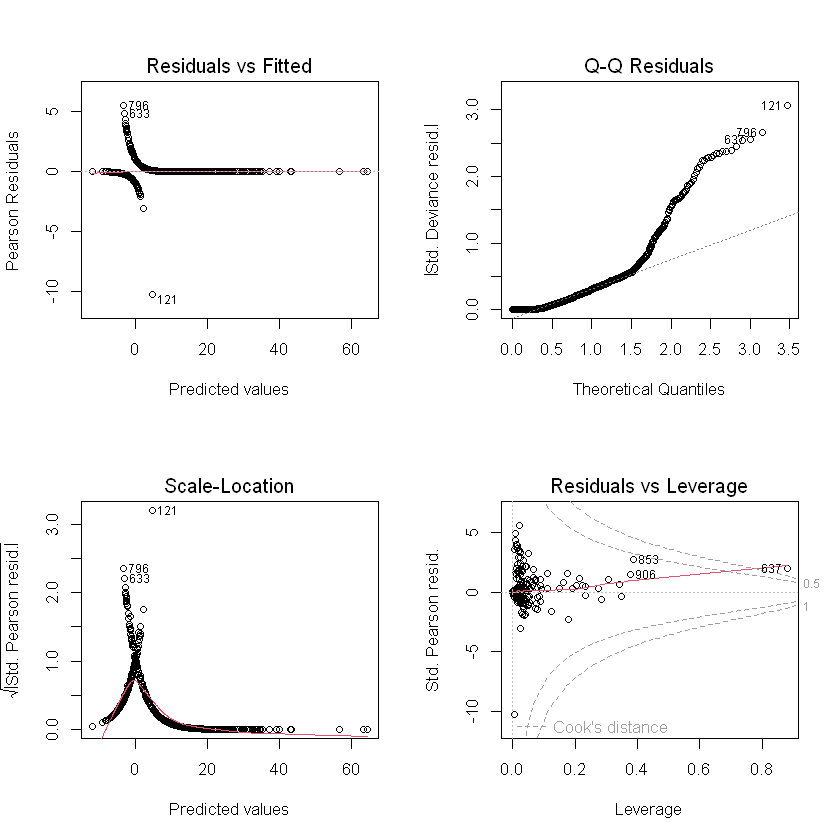

In [61]:
par(mfrow=c(2,2))
plot(fit12)

In [62]:
actual <- down_fraud_data$Class
predicted <- round(fitted(fit12))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual   0   1
     0 458  15
     1  39 434

In [63]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.943